In [1]:
# %pip install pandas==2.2.3 matplotlib==3.9.3 seaborn==0.13.2 scikit-learn==1.6.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set_theme()

In [3]:
# Đọc dữ liệu
df = pd.read_csv('bank_transactions.csv')

In [4]:
# Hiển thị 5 dòng đầu tiên
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
# Hiển thị thông tin của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
# Xem số lượng dữ liệu bị thiếu
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [7]:
# Xóa các dòng dữ liệu bị thiếu
df.dropna(inplace=True)

In [8]:
# Xem số lượng dữ liệu bị trùng
df.duplicated().sum()

np.int64(0)

In [9]:
# Thống kê mô tả
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


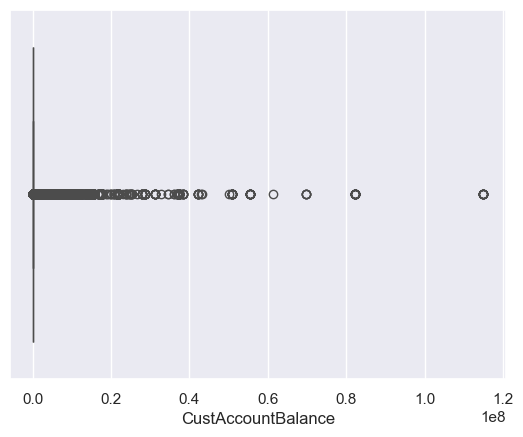

In [10]:
# Vẽ biểu đồ phân phối của cột CustAccountBalance với dữ liệu thô
sns.boxplot(data=df, x='CustAccountBalance')
plt.show()

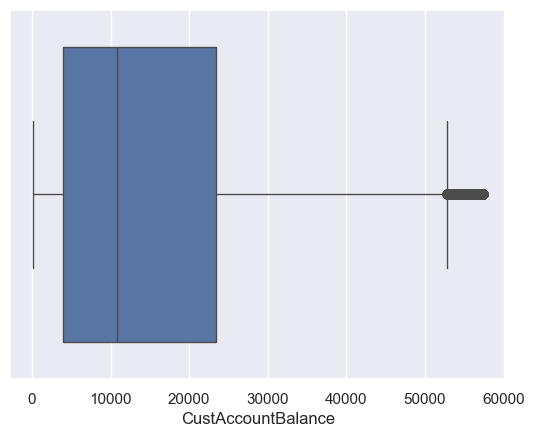

In [11]:
# Vẽ biểu đồ phân phối của cột CustAccountBalance với dữ liệu đã lọc bớt các outliers
lower_quantile = df['CustAccountBalance'].quantile(0.05)
upper_quantile = df['CustAccountBalance'].quantile(0.75)
filtered_df = df[(df['CustAccountBalance'] >= lower_quantile) & (df['CustAccountBalance'] <= upper_quantile)]

sns.boxplot(data=filtered_df, x='CustAccountBalance')
plt.show()

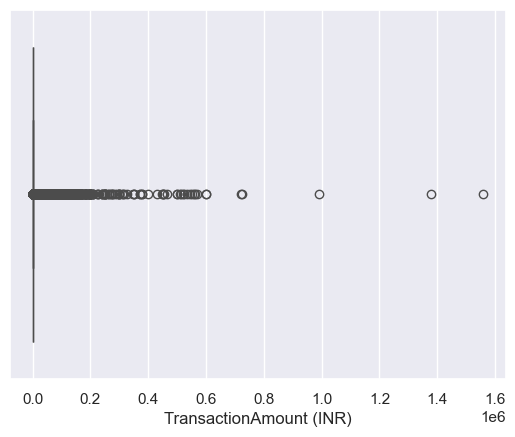

In [12]:
# Vẽ biểu đồ phân phối của cột TransactionAmount (INR) với dữ liệu thô
sns.boxplot(data=df, x='TransactionAmount (INR)')
plt.show()

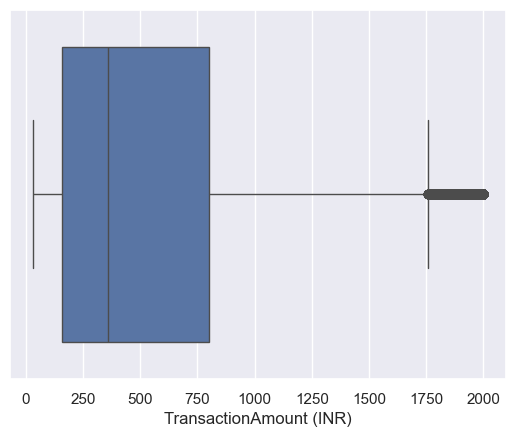

In [13]:
# Vẽ biểu đồ phân phối của cột TransactionAmount (INR) với dữ liệu đã lọc bớt các outliers
lower_quantile = df['TransactionAmount (INR)'].quantile(0.05)
upper_quantile = df['TransactionAmount (INR)'].quantile(0.85)
filtered_df = df[(df['TransactionAmount (INR)'] >= lower_quantile) & (df['TransactionAmount (INR)'] <= upper_quantile)]

sns.boxplot(data=filtered_df, x='TransactionAmount (INR)')
plt.show()

In [14]:
# Chuyển kiểu dữ liệu của cột 'TransactionDate' và 'CustomerDOB' sang kiểu datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

########
# Sửa lại cột DOB
########

# Tính toán tuổi của khách hàng
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68631/1925202472.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68631/1925202472.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38


In [15]:
# Kiểm tra xem có khách hàng nào có tuổi âm không
len(df[df['CustomerAge'] < 0]) / len(df)

0.10064572864804044

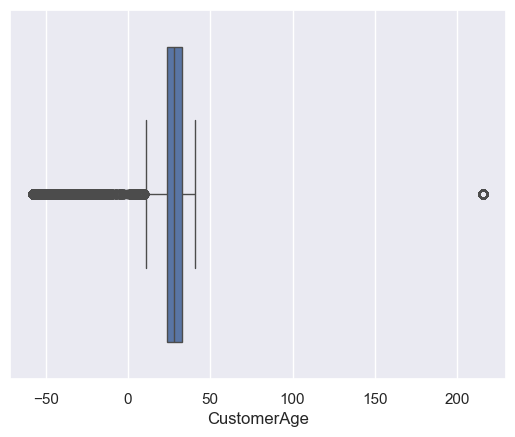

In [16]:
# Vẽ biểu đồ phân phối của cột CustomerAge với dữ liệu thô
sns.boxplot(data=df, x='CustomerAge')
plt.show()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64


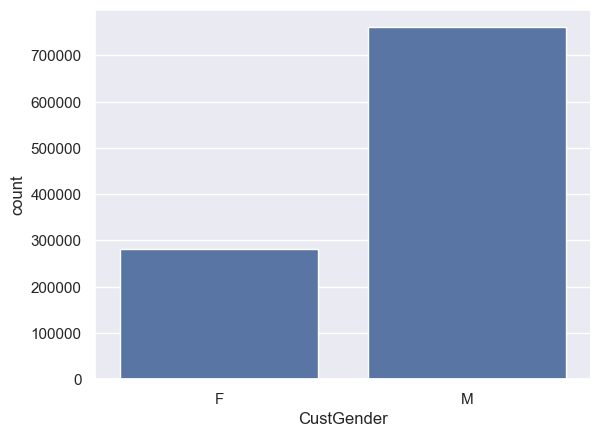

In [17]:
# Xem số lượng khách hàng theo giới tính
print(df.CustGender.value_counts())
df.drop(df[df['CustGender']=='T'].index,inplace=True)

sns.countplot(data=df, x='CustGender')
plt.show()

# RFM Metrics - Tính Recency, Frequency và Monetary

#### Recency - là thời gian kể từ lần mua hàng gần nhất của khách hàng. Recency càng cao thì khách hàng càng không hoạt động gần đây.

#### Frequency - là số lần mua hàng của khách hàng. Frequency càng cao thì khách hàng càng mua hàng nhiều.

#### Monetary - là tổng giá trị mà khách hàng đã mua hàng. Monetary càng cao thì khách hàng càng chi tiền nhiều.

In [18]:
df['TransactionDate1'] = df['TransactionDate'] # Tìm ra ngày giao dịch đầu tiên
df['TransactionDate2'] = df['TransactionDate'] # Tìm ra ngày giao dịch cuối cùng

In [19]:
grouped_df = df.groupby("CustomerID").agg({
    "TransactionID" : "count",
    "CustGender" : "first",
    "CustLocation":"first",
    "CustAccountBalance"  : "mean",
    "TransactionAmount (INR)" : "mean",
    "CustomerAge" : "median",
    "TransactionDate2":"max",
    "TransactionDate1":"min",
    "TransactionDate":"median"
})

grouped_df = grouped_df.reset_index()
grouped_df

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15
4,C1010024,1,M,KOLKATA,87058.650,5000.0,-49.0,2016-08-18,2016-08-18,2016-08-18
...,...,...,...,...,...,...,...,...,...,...
879352,C9099836,1,M,BHIWANDI,133067.230,691.0,26.0,2016-07-08,2016-07-08,2016-07-08
879353,C9099877,1,M,BANGALORE,96063.460,222.0,20.0,2016-09-15,2016-09-15,2016-09-15
879354,C9099919,1,M,GUNTUR,5559.750,126.0,23.0,2016-08-18,2016-08-18,2016-08-18
879355,C9099941,1,M,CHENNAI,35295.920,50.0,21.0,2016-08-28,2016-08-28,2016-08-28


In [20]:
grouped_df["Frequency"] = grouped_df["TransactionID"]
grouped_df["Monetary"] = grouped_df["TransactionAmount (INR)"] * grouped_df["Frequency"]
grouped_df['Recency'] = grouped_df['TransactionDate2'] - grouped_df['TransactionDate1']
grouped_df['Recency'] = grouped_df['Recency'].dt.days + 1
MRF_df = grouped_df[['Monetary', 'Recency', 'Frequency']]
MRF_df

,Monetary,Recency,Frequency
0,5106.0,19,2
1,1499.0,1,1
2,1455.0,183,2
3,30.0,1,1
4,5000.0,1,1
...,...,...,...
879352,691.0,1,1
879353,222.0,1,1
879354,126.0,1,1
879355,50.0,1,1


In [21]:
MRF_df.describe()

,Monetary,Recency,Frequency
count,8.793570e+05,879357.000000,879357.000000
mean,1.855032e+03,16.034774,1.184517
std,7.188245e+03,46.922860,0.448954
min,0.000000e+00,1.000000,1.000000
25%,2.000000e+02,1.000000,1.000000
50%,5.330000e+02,1.000000,1.000000
75%,1.500000e+03,1.000000,1.000000
max,1.560035e+06,337.000000,6.000000


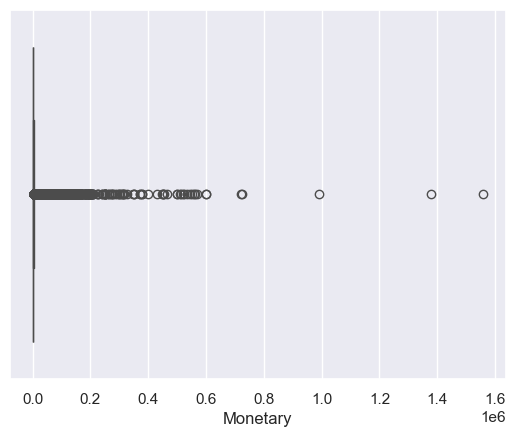

In [22]:
sns.boxplot(data=MRF_df, x='Monetary')
plt.show()

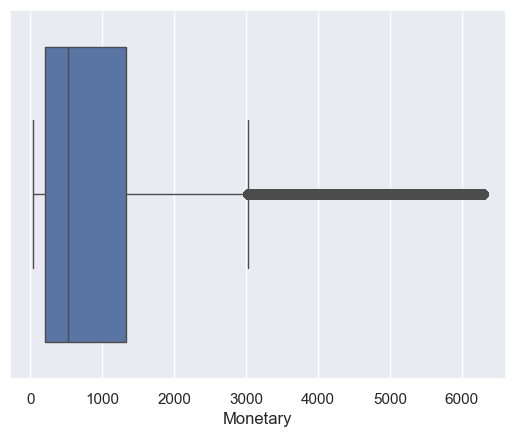

In [23]:
# Vẽ biểu đồ phân phối của cột Monetary với dữ liệu đã lọc bớt các outliers
lower_quantile = MRF_df['Monetary'].quantile(0.05)
upper_quantile = MRF_df['Monetary'].quantile(0.95)
filtered_df = MRF_df[(MRF_df['Monetary'] >= lower_quantile) & (MRF_df['Monetary'] <= upper_quantile)]

sns.boxplot(data=filtered_df, x='Monetary')
plt.show()

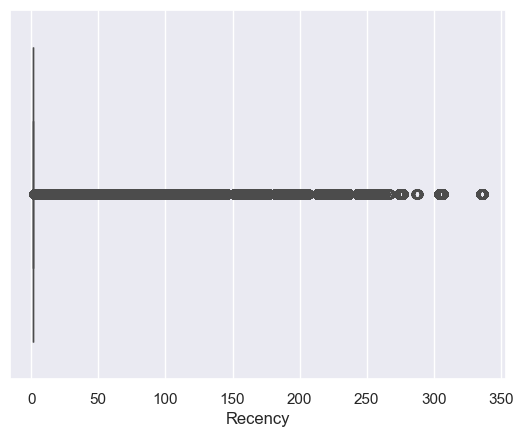

In [24]:
sns.boxplot(data=MRF_df, x='Recency')
plt.show()

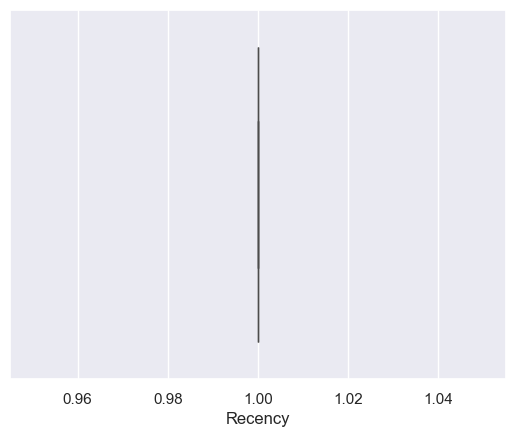

In [25]:
# Vẽ biểu đồ phân phối của cột Recency với dữ liệu đã lọc bớt các outliers
lower_quantile = MRF_df['Recency'].quantile(0.05)
upper_quantile = MRF_df['Recency'].quantile(0.80)
filtered_df = MRF_df[(MRF_df['Recency'] >= lower_quantile) & (MRF_df['Recency'] <= upper_quantile)]

sns.boxplot(data=filtered_df, x='Recency')
plt.show()

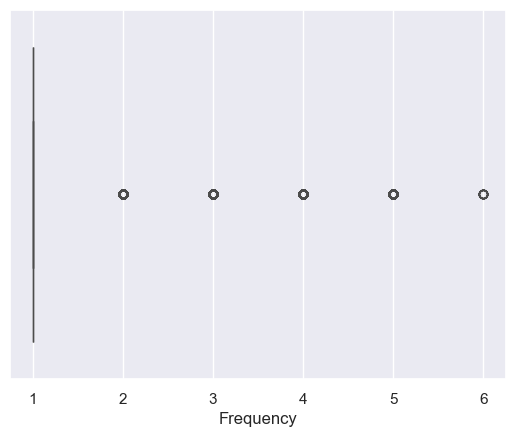

In [26]:
sns.boxplot(data=MRF_df, x='Frequency')
plt.show()

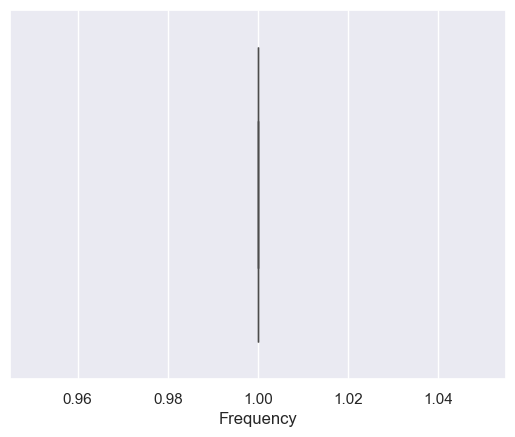

In [27]:
# Vẽ biểu đồ phân phối của cột Frequency với dữ liệu đã lọc bớt các outliers
lower_quantile = MRF_df['Frequency'].quantile(0.05)
upper_quantile = MRF_df['Frequency'].quantile(0.80)
filtered_df = MRF_df[(MRF_df['Frequency'] >= lower_quantile) & (MRF_df['Frequency'] <= upper_quantile)]

sns.boxplot(data=filtered_df, x='Frequency')
plt.show()

In [28]:
grouped_df

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate,Frequency,Monetary,Recency
0,C1010011,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17,2,5106.0,19
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,1,1499.0,1
2,C1010014,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08,2,1455.0,183
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,1,30.0,1
4,C1010024,1,M,KOLKATA,87058.650,5000.0,-49.0,2016-08-18,2016-08-18,2016-08-18,1,5000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879352,C9099836,1,M,BHIWANDI,133067.230,691.0,26.0,2016-07-08,2016-07-08,2016-07-08,1,691.0,1
879353,C9099877,1,M,BANGALORE,96063.460,222.0,20.0,2016-09-15,2016-09-15,2016-09-15,1,222.0,1
879354,C9099919,1,M,GUNTUR,5559.750,126.0,23.0,2016-08-18,2016-08-18,2016-08-18,1,126.0,1
879355,C9099941,1,M,CHENNAI,35295.920,50.0,21.0,2016-08-28,2016-08-28,2016-08-28,1,50.0,1


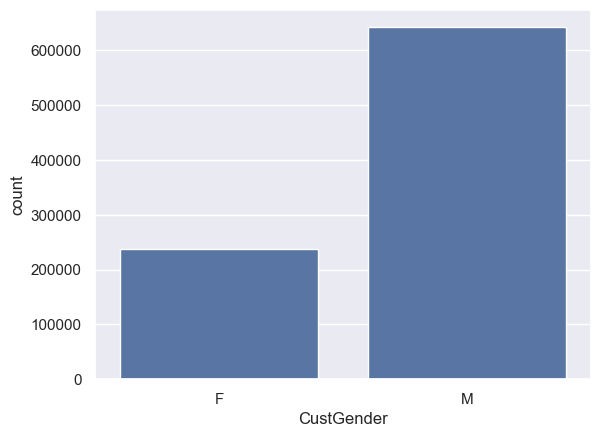

In [29]:
sns.countplot(data=grouped_df, x='CustGender')
plt.show()

In [30]:
location_df = grouped_df['CustLocation'].value_counts()
location_df

CustLocation
MUMBAI                      86202
NEW DELHI                   70888
BANGALORE                   68733
GURGAON                     62363
DELHI                       59569
                            ...  
KOTDWARA PAURI GARHWAL          1
KALNA                           1
PUNE MUMBAI HIGHWAY PUNE        1
BAREGARH                        1
13 GORAKHPUR                    1
Name: count, Length: 8946, dtype: int64

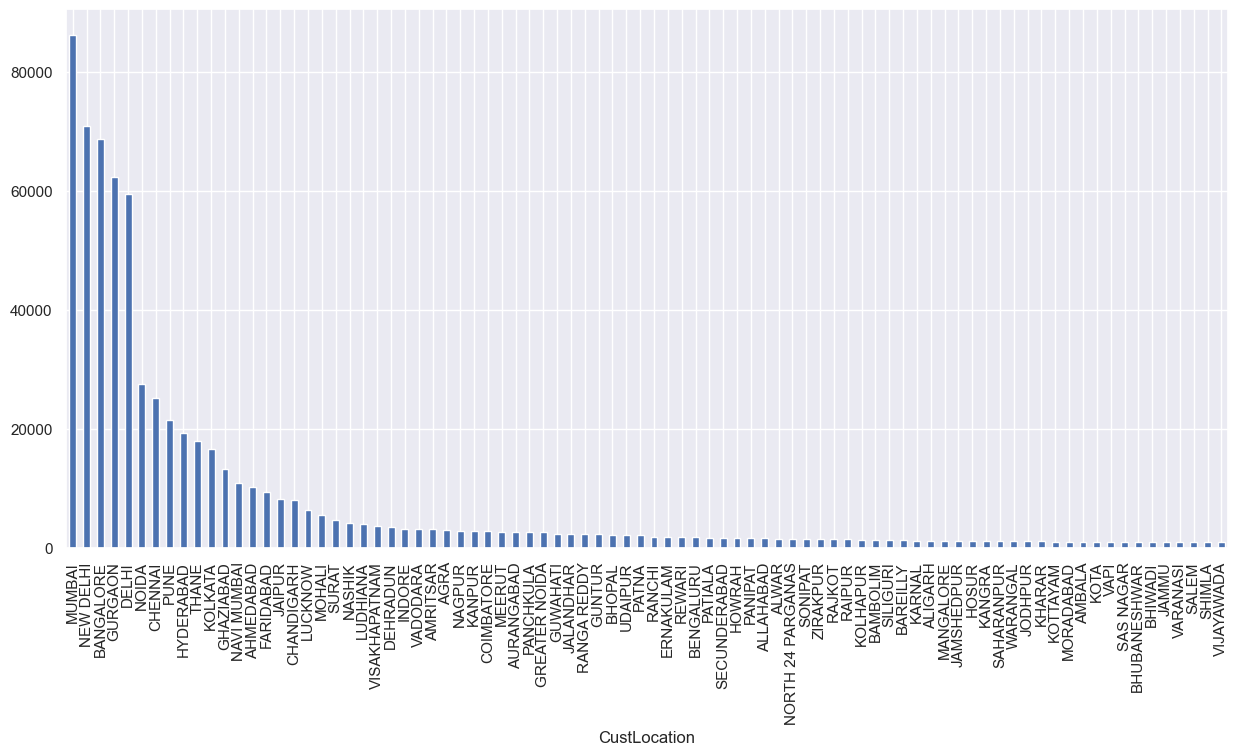

In [31]:
plt.figure(figsize=(15, 7))
location_df[location_df > 1000].plot(kind='bar')
plt.show()

<Axes: >

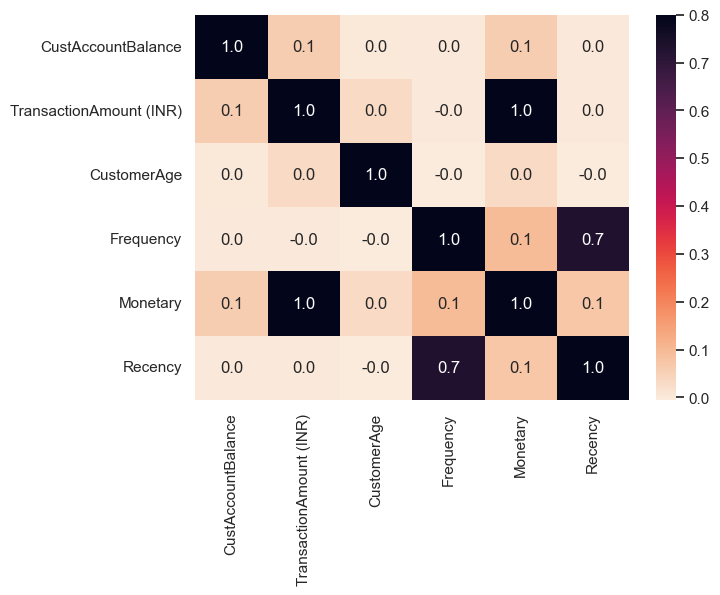

In [32]:
plt.figure(figsize=(7, 5))
correlation = grouped_df.drop(columns=[
    'CustomerID',
    'TransactionID',
    'CustGender',
    'CustLocation',
    'TransactionDate2',
    'TransactionDate1',
    'TransactionDate'
]).corr()
sns.heatmap(
    correlation,
    vmin=None,
    vmax=0.8,
    cmap='rocket_r',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True
)

[]

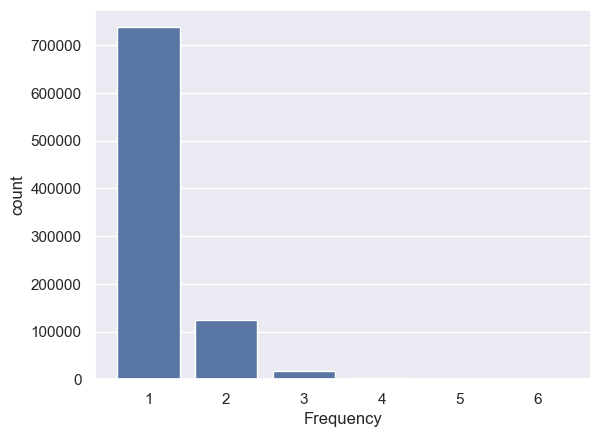

In [33]:
sns.countplot(data=grouped_df, x='Frequency')
plt.plot()

In [34]:
grouped_df

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate2,TransactionDate1,TransactionDate,Frequency,Monetary,Recency
0,C1010011,2,F,NOIDA,76340.635,2553.0,28.5,2016-09-26,2016-09-08,2016-09-17,2,5106.0,19
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14,1,1499.0,1
2,C1010014,2,F,MUMBAI,100112.950,727.5,28.0,2016-07-08,2016-01-08,2016-04-08,2,1455.0,183
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26.0,2016-09-15,2016-09-15,2016-09-15,1,30.0,1
4,C1010024,1,M,KOLKATA,87058.650,5000.0,-49.0,2016-08-18,2016-08-18,2016-08-18,1,5000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879352,C9099836,1,M,BHIWANDI,133067.230,691.0,26.0,2016-07-08,2016-07-08,2016-07-08,1,691.0,1
879353,C9099877,1,M,BANGALORE,96063.460,222.0,20.0,2016-09-15,2016-09-15,2016-09-15,1,222.0,1
879354,C9099919,1,M,GUNTUR,5559.750,126.0,23.0,2016-08-18,2016-08-18,2016-08-18,1,126.0,1
879355,C9099941,1,M,CHENNAI,35295.920,50.0,21.0,2016-08-28,2016-08-28,2016-08-28,1,50.0,1


In [35]:
grouped_df['CustGender'] = grouped_df['CustGender'].map({'M':1,'F':0})
grouped_df['CustLocation'] = grouped_df['CustLocation'].astype('category').cat.codes
train_df = grouped_df.drop(columns=['CustomerID', 'TransactionID', 'TransactionDate2','TransactionDate1','TransactionDate'])
train_df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,Frequency,Monetary,Recency
0,0,5630,76340.635,2553.0,28.5,2,5106.0,19
1,1,5038,24204.490,1499.0,22.0,1,1499.0,1
2,0,5038,100112.950,727.5,28.0,2,1455.0,183
3,0,1451,496.180,30.0,26.0,1,30.0,1
4,1,4086,87058.650,5000.0,-49.0,1,5000.0,1
...,...,...,...,...,...,...,...,...
879352,1,1088,133067.230,691.0,26.0,1,691.0,1
879353,1,741,96063.460,222.0,20.0,1,222.0,1
879354,1,2936,5559.750,126.0,23.0,1,126.0,1
879355,1,1532,35295.920,50.0,21.0,1,50.0,1


In [36]:
train_df = (train_df - train_df.mean()) / train_df.std()
train_df = train_df.sample(frac=0.01).reset_index(drop=True)

In [37]:
kmeans_set = {"init":"random", "max_iter":300, "random_state":42}

# Tổng bình phương khoảng cách từ các điểm dữ liệu đến tâm cụm của nó
inertias = []
# Được tính bằng cách lấy sự khác biệt giữa các điểm dữ liệu trong cụm và các cụm xung quanh
silhouette_coefficients = []

testing_n_clusters = range(2, 11)

for k in testing_n_clusters:
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(train_df)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(train_df, kmeans.labels_)
    silhouette_coefficients.append(score)

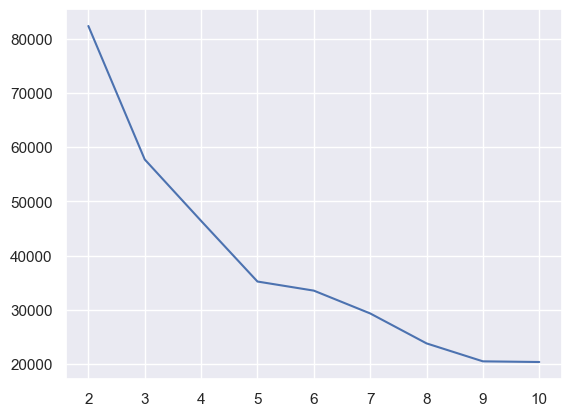

In [38]:
sns.lineplot(x=testing_n_clusters, y=inertias)
plt.show()

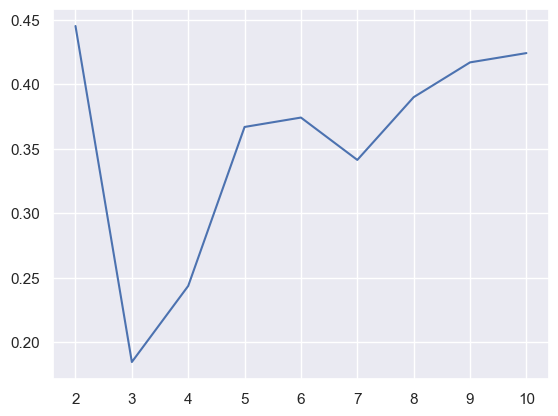

In [39]:
sns.lineplot(x=testing_n_clusters, y=silhouette_coefficients)
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5 , **kmeans_set)    
kmeans.fit(train_df)
train_df['Cluster'] = kmeans.labels_
train_df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,Frequency,Monetary,Recency,Cluster
0,-1.645852,-0.860020,-0.137650,-0.232663,-0.059866,-0.410992,-0.248326,-0.320415,1
1,0.607587,0.481568,-0.139370,-0.216341,-0.080640,-0.410992,-0.233719,-0.320415,0
2,-1.645852,-1.254914,0.145488,-0.117634,-0.059866,-0.410992,-0.145381,-0.320415,1
3,0.607587,-0.434884,-0.139699,-0.087167,-0.059866,-0.410992,-0.118114,-0.320415,0
4,-1.645852,0.481568,-0.130575,-0.239658,-0.018317,-0.410992,-0.254587,-0.320415,1
...,...,...,...,...,...,...,...,...,...
8789,-1.645852,-0.597926,-0.107816,-0.151599,-0.070253,1.816406,-0.093490,3.323864,4
8790,0.607587,-1.414449,0.217959,-0.158827,-0.039091,-0.410992,-0.182246,-0.320415,0
8791,0.607587,0.481568,-0.115392,-0.239300,-1.784123,-0.410992,-0.254267,-0.320415,0
8792,-1.645852,0.741033,-0.101632,-0.046890,-0.007930,1.816406,0.093930,5.497645,4


In [41]:
train_df['Cluster'].value_counts()

Cluster
0    5654
1    2200
4     886
3      52
2       2
Name: count, dtype: int64